In [12]:
%load_ext autoreload
%autoreload 2


%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
%cd C:\MAD4AG

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\MAD4AG


In [14]:


# List the CSV files in the directory
directory = r'.\dbs\twins'
#simulation_days = [file for file in os.listdir(directory) if file.endswith('-day.pkl')]
simulation_days = [file for file in os.listdir(directory) if file.startswith('03-15')]
simulation_days

['03-15-simulation-0-day.pkl',
 '03-15-simulation-1-day.pkl',
 '03-15-simulation-2-day.pkl',
 '03-15-simulation-3-day.pkl',
 '03-15-simulation-4-day.pkl']

In [15]:
count = 0

# Loop through each CSV file and combine the data
for file in simulation_days:
    # Read the CSV file into a DataFrame
    if count==0:
        combined_df = pd.read_pickle(os.path.join(directory, file))
        combined_df.rename(columns={'act_seq_simp':'act_seq_simp_'+str(count), 'sub_id':'sub_id_'+str(count)}, inplace=True)
    else:
        new_seq = pd.read_pickle(os.path.join(directory, file))
        new_seq.rename(columns={'act_seq_simp':'act_seq_simp_'+str(count), 'sub_id':'sub_id_'+str(count)}, inplace=True)
        combined_df = pd.merge(combined_df, new_seq[['uid','act_seq_simp_'+str(count),'sub_id_'+str(count)]], on='uid', how='left')
    count+=1


In [16]:
combined_df['unique_sub_id'] = combined_df[['sub_id_0', 'sub_id_1', 'sub_id_2', 'sub_id_3', 'sub_id_4']].values.tolist()

In [17]:
def calculate_list_length(lst):
    lst = list(set(lst))
    return len(lst)

# Apply the function to each row in the specified column
combined_df['unique_sub_id'] = combined_df['unique_sub_id'].apply(calculate_list_length)

In [18]:
combined_df['unique_act_seq'] = combined_df[['act_seq_simp_0', 'act_seq_simp_1', 'act_seq_simp_2', 'act_seq_simp_3', 'act_seq_simp_4']].values.tolist()


In [19]:
def calculate_list_length(lst):
    lst = list(set(lst))
    return len(lst)


# Apply the function to each row in the specified column
combined_df['unique_act_seq'] = combined_df['unique_act_seq'].apply(calculate_list_length)


C:\Users\aglar\AppData\Local\anaconda3\envs\pycharm\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


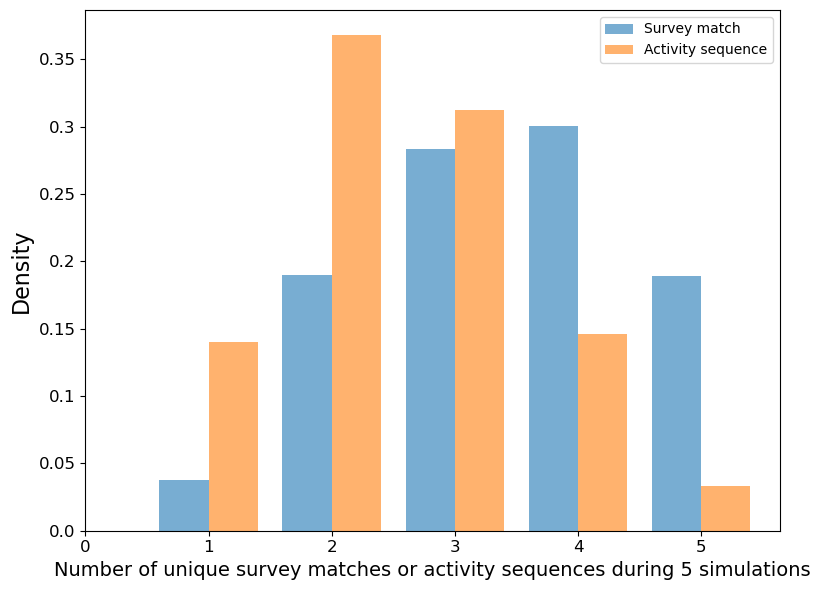

In [20]:
fig, (ax0) = plt.subplots(nrows=1, ncols=1, figsize = (8, 6))

all_data = [combined_df['unique_sub_id'],combined_df['unique_act_seq']]

ax0.hist(all_data, density=True, histtype='bar', label=['Survey match','Activity sequence'], alpha=0.6, bins=range(1,7,1))
ax0.legend( prop={'size': 10}, fontsize=14)
ax0.set_xlabel('Number of unique survey matches or activity sequences during 5 simulations', fontsize=14)
# ax0.set_title('Range [0, 15%]', fontsize=14)
# #ax0.set_xticklabels(np.arange(-6, 31, step=6), fontsize=12)
ax0.set_xticks(np.arange(0.5, 6.5, step=1),range(0,6,1), fontsize=12)
ax0.set_yticklabels(np.round(np.arange(0, 0.4, step=0.05),2), fontsize=12)
ax0.set_ylabel('Density', fontsize=16)



#fig.suptitle('Detected homes vs population', fontsize=14)

fig.tight_layout()
plt.savefig("./figures/multiple_days_histogram.png")


In [21]:
from collections import Counter

def activity_counter(data, act_type , i):
    act_tuple = data['act_seq_simp_'+ str(i)]
    count_seq = Counter(act_tuple).get(act_type)
    if count_seq is None:
        count_seq = 0
    return count_seq


for i in range(5):
    column_name= 'home_count_'+str(i)
    combined_df[column_name] = combined_df.apply(lambda row: activity_counter(row,'Home', i), axis=1)
    column_name= 'work_count_'+str(i)
    combined_df[column_name] = combined_df.apply(lambda row: activity_counter(row,'Work', i), axis=1)
    column_name= 'school_count_'+str(i)
    combined_df[column_name] = combined_df.apply(lambda row: activity_counter(row,'School', i), axis=1)
    column_name= 'other_count_'+str(i)
    combined_df[column_name] = combined_df.apply(lambda row: activity_counter(row,'Other', i), axis=1)




In [22]:
home_counts= []
work_counts= []
school_counts= []
other_counts= []

for i in range(5):
    column_name= 'home_count_'+str(i)
    home_counts.append(int(np.round(np.sum(combined_df[column_name]* combined_df['wt']))))
    column_name= 'work_count_'+str(i)
    work_counts.append(int(np.round(np.sum(combined_df[column_name]* combined_df['wt']))))
    column_name= 'school_count_'+str(i)
    school_counts.append(int(np.round(np.sum(combined_df[column_name]* combined_df['wt']))))
    column_name= 'other_count_'+str(i)
    other_counts.append(int(np.round(np.sum(combined_df[column_name]* combined_df['wt']))))

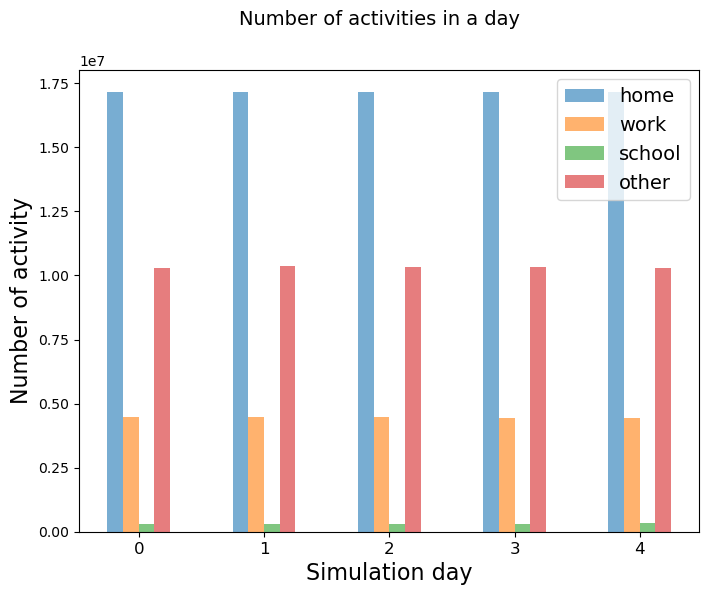

In [23]:
fig, (ax0) = plt.subplots(nrows=1, ncols=1, figsize = (8, 6))

X = np.arange(5)

ax0.bar(X- 0.1875, home_counts, width = 0.125, alpha=0.6, label='home')
ax0.bar(X- 0.0625, work_counts, width = 0.125, alpha=0.6, label='work')
ax0.bar(X+ 0.0625, school_counts, width = 0.125, alpha=0.6, label='school')
ax0.bar(X+ 0.1875, other_counts, width = 0.125, alpha=0.6, label='other')
# ax0.grid(visible=False)
# ax0.grid(visible=False)

#
ax0.legend( prop={'size': 14}, fontsize=14)
ax0.set_xlabel('Simulation day', fontsize=16)
ax0.set_xticks(range(0,5),range(0,5), fontsize=12)
#ax0.set_yticklabels(range(0, 25, 5), fontsize=12)
ax0.set_ylabel('Number of activity', fontsize=16)


fig.suptitle('Number of activities in a day' , fontsize=14)
#fig.tight_layout()
plt.savefig("./figures/number_of_activities_in_a_day.jpg")
plt.show()


In [24]:
filename = r'.\dbs\twins\multiple_days.pkl'

combined_df.to_pickle(filename)